## Bayesian Approach to Data Analysis

**Source:** https://juanitorduz.github.io/intro_pymc3/

Assume that we have a samle of observations $y_1, ..., y_n$ of a random variable $Y \sim f(y | \theta)$, where $\theta$ is a parameter for the distribution. Here we consider $\theta$ as a random variable as well. Following Bayes Theorem we can write

\begin{align*}
    f ( \theta | y) = \frac{f (y | \theta) f (\theta)}{f(y)} = \frac{f (y | \theta) f(\theta)}{\int f(y|\theta) f(\theta) d\theta}
\end{align*}

* The function $f(y | \theta)$ is called the **likelihood**
* $f(\theta)$ is the **prior** distribution of $\theta$ 

Note that $f(y)$ does not depend on $\theta$, thus it can be considered as just a "normalizing constant".  It is therefore enough to consider the relation

\begin{align*}
    f (\theta | y) \propto \text{likelihood } \times \text{ prior}
\end{align*}

### Example

In order to give a better sense of the relation above we are going to study a concrete example. Consider $n$ samles of $Y \sim \text{ Poiss}(\lambda)$. Recall that the Poisson distribution is given by

\begin{align*}
    f(y_i | \lambda) = \frac{e^{- \lambda} \lambda^{y_i}}{y_i !}
\end{align*}

where $\lambda > 0$. It is easy to verify that the **expected value** and **variance** are $\mathrm{E}(Y) = \lambda$ and $\mathrm{Var}(Y) = \lambda$ respectively.

In [1]:
import numpy as np
import scipy.stats as ss

# We set a seed so that the results are reproducible.
np.random.seed(5)

# number of samples.
n = 100

# true parameter.
lam_true = 2

# sample array.
y = np.random.poisson(lam=lam_true, size=n)

y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

In [2]:
# mean of the sample.
y.mean()

2.06

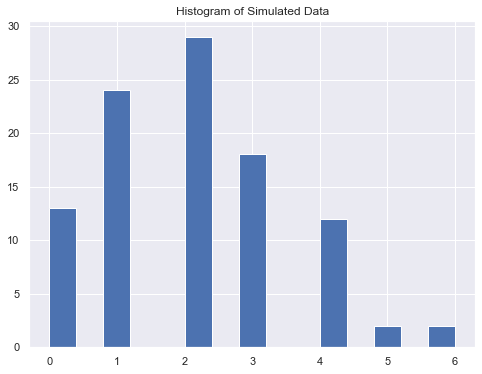

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Histogram of the sample.
plt.figure(figsize=(8, 6))
plt.hist(y, bins=15)
plt.title('Histogram of Simulated Data');

#### Prior: Gamma Distribution 

Let us consider a gamma prior distribution for the parameter $\lambda \sim \Gamma (a,b)$. Recall that the density function for the gamma distribution is 

\begin{align*}
    f (\lambda) = \frac{b^a}{\Gamma (a)} \lambda^{a-1} e^{-b \lambda}
\end{align*}

where $a>0$ is the **shape** parameter and $b>0$ is the **rate** parameter. One verifies that 

\begin{align*}
    \mathrm{E}(\lambda) = \frac{a}{b} \quad \text{and} \quad \mathrm{Var}(\lambda) = \frac{a}{b^2}
\end{align*}

Let us plot a gamma distribution for parameters $a=3.5$ and $b=2$. 

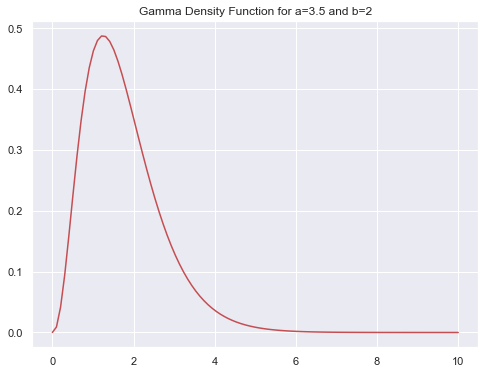

In [4]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2 # rate = 1/scale

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)